In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/ProjectCode/Data Pipelines/Cleaned_AAPL.csv', parse_dates=['date'])


In [3]:
data['Price_Change'] = data['RET']

In [4]:
lookback_period = 14
# typically 14 days for rsi 

In [5]:
data['Gain'] = np.where(data['Price_Change'] > 0, data['Price_Change'], 0)
data['Loss'] = np.where(data['Price_Change'] < 0, abs(data['Price_Change']), 0)

In [6]:
# rolling avg for gain and loss
data['Avg_Gain'] = data['Gain'].rolling(window=lookback_period, min_periods=1).mean()
data['Avg_Loss'] = data['Loss'].rolling(window=lookback_period, min_periods=1).mean()


In [7]:
# Calculate Relative Strength (RS)
data['RS'] = data['Avg_Gain'] / data['Avg_Loss']

In [8]:
# calc usign formula : RSI = 100 - (100 / (1 + RS))
data['RSI'] = 100 - (100 / (1 + data['RS']))

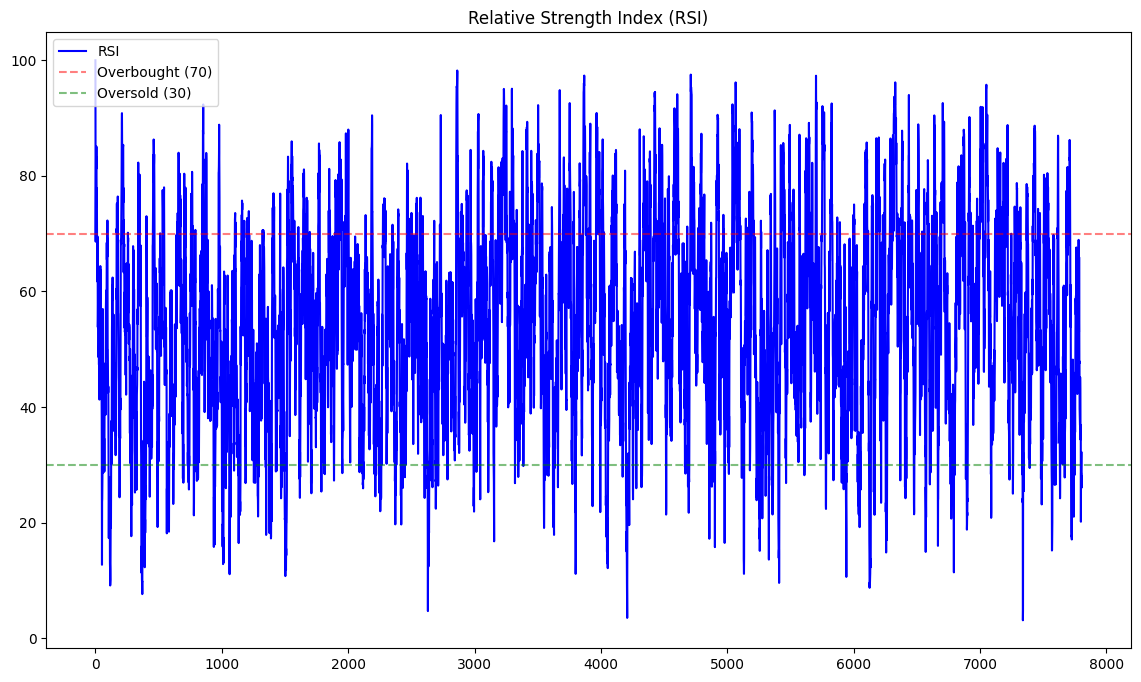

In [9]:
plt.figure(figsize=(14, 8))
plt.plot(data['RSI'], label='RSI', color='b')
plt.axhline(70, linestyle='--', alpha=0.5, color='r', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='g', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend(loc='best')
plt.show()


In [10]:
print(data[['RSI']].head(20))

           RSI
0   100.000000
1    86.836375
2    68.617548
3    74.693804
4    79.461588
5    83.360790
6    83.360790
7    81.219985
8    85.069801
9    78.854509
10   74.697010
11   77.848685
12   74.477424
13   63.767666
14   61.737284
15   65.436086
16   69.517477
17   66.836480
18   65.347930
19   53.823825


In [14]:
overbought_data = data[data['RSI'] > 70]
oversold_data = data[data['RSI'] < 30]

overbought_oversold_data = pd.concat([overbought_data, oversold_data])


In [13]:
# Display the overbought and oversold data
overbought_oversold_data

,date,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,DJI_Return,Price_Change,Gain,Loss,Avg_Gain,Avg_Loss,RS,RSI
0,1992-01-02,0.055432,0.717745,0.008403,4.510000e-10,0.000408,17.419850,0.000000,0.055432,0.055432,0.000000,0.055432,0.000000,inf,100.000000
1,1992-01-03,-0.008403,-0.172890,0.004237,-8.340000e-11,0.004985,14.408127,0.009173,-0.008403,0.000000,0.008403,0.027716,0.004202,6.596692,86.836375
3,1992-01-07,0.019397,0.237283,0.004228,2.590000e-10,-0.001340,10.702726,0.001469,0.019397,0.019397,0.000000,0.018707,0.006338,2.951601,74.693804
4,1992-01-08,0.023256,0.645321,0.004132,1.840000e-10,0.001677,17.609419,-0.000281,0.023256,0.023256,0.000000,0.019617,0.005070,3.868926,79.461588
5,1992-01-09,0.028926,-0.104730,0.008032,2.490000e-10,-0.001172,15.765178,0.001748,0.028926,0.028926,0.000000,0.021169,0.004225,5.009901,83.360790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,2022-12-21,0.023809,0.106232,0.000221,2.050000e-12,0.014868,5.397705,0.016035,0.023809,0.023809,0.000000,0.004222,0.010525,0.401175,28.631349
7800,2022-12-22,-0.023773,-0.092628,0.000227,-2.310000e-12,-0.014452,4.897729,-0.010456,-0.023773,0.000000,0.023773,0.004222,0.011982,0.352385,26.056562
7801,2022-12-23,-0.002798,-0.181476,0.000076,-3.330000e-13,0.005868,4.008909,0.005342,-0.002798,0.000000,0.002798,0.004222,0.011612,0.363624,26.666005
7802,2022-12-27,-0.013878,0.081093,0.000231,-1.550000e-12,-0.004050,4.334004,0.001133,-0.013878,0.000000,0.013878,0.004222,0.010791,0.391284,28.123944


-- additional things to implement

- RSI with moving averages
- RSI as a trend filter
- RSI based stop loss


	Buy Signal:
	•	RSI is below 30 (oversold), AND
	•	The short-term moving average crosses above the long-term moving average (bullish crossover).
	Sell Signal:
	•	RSI is above 70 (overbought), AND
	•	The short-term moving average crosses below the long-term moving average (bearish crossover).

### WIth MA

In [15]:
short_window = 50
long_window = 200
data['Short_MA'] = data['RET'].rolling(window=short_window).mean()
data['Long_MA'] = data['RET'].rolling(window=long_window).mean()

In [17]:
data['Signal'] = 0
data['Signal'][(data['RSI'] < 30) & (data['Short_MA'] > data['Long_MA'])] = 1  # Buy Signal
data['Signal'][(data['RSI'] > 70) & (data['Short_MA'] < data['Long_MA'])] = -1  # Sell Signal

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_81987/4034501997.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][(data['RSI'] < 30) & (data['Short_MA'] > data['Long_MA'])] = 1  # Buy Signal
/var/folders/69/00tjy

In [18]:
data['Position'] = data['Signal'].diff()

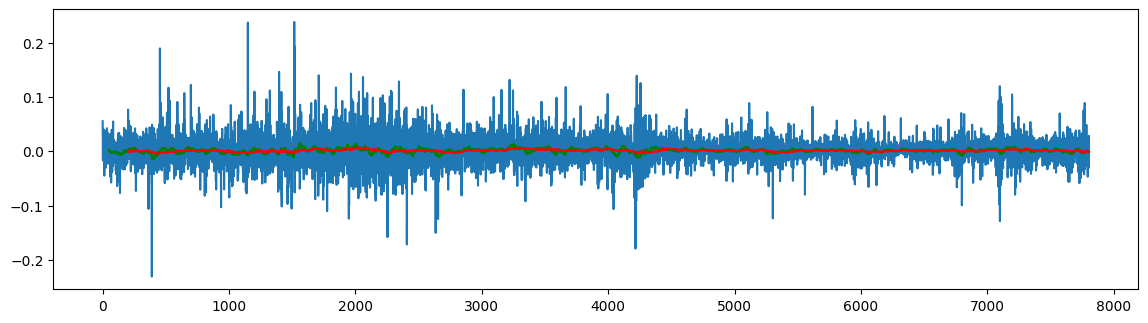

In [19]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['RET'], label='Price')
plt.plot(data.index, data['Short_MA'], label='50-day MA', color='green')
plt.plot(data.index, data['Long_MA'], label='200-day MA', color='red')

Text(0.5, 1.0, 'Price with Moving Averages and Buy/Sell Signals')

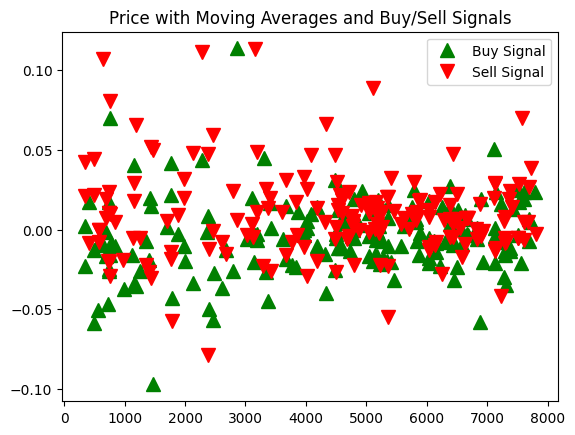

In [20]:
plt.plot(data[data['Position'] == 1].index, data['RET'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['RET'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.legend(loc='best')
plt.title('Price with Moving Averages and Buy/Sell Signals')

-- too many signals, reduce this by adding
    - adjust ma window
    - add additional filters

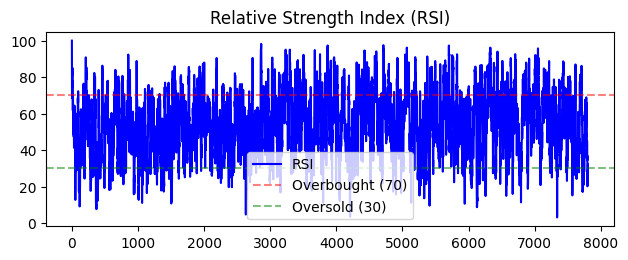

In [21]:
plt.subplot(2, 1, 2)
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')
plt.legend(loc='best')
plt.title('Relative Strength Index (RSI)')
plt.tight_layout()
plt.show()

## Additional filters

In [22]:
# Additional filter: Only buy when RSI crosses back above 30 after being below it
# Only sell when RSI crosses back below 70 after being above it
data['RSI_Buy_Signal'] = np.where((data['RSI'].shift(1) < 30) & (data['RSI'] > 30), 1, 0)
data['RSI_Sell_Signal'] = np.where((data['RSI'].shift(1) > 70) & (data['RSI'] < 70), -1, 0)

In [23]:
# Generate signals only when both RSI and Moving Average crossovers confirm
data['Signal'] = 0
data['Signal'][(data['RSI_Buy_Signal'] == 1) & (data['Short_MA'] > data['Long_MA'])] = 1  # Buy Signal
data['Signal'][(data['RSI_Sell_Signal'] == -1) & (data['Short_MA'] < data['Long_MA'])] = -1  # Sell Signal

/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_81987/53648460.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][(data['RSI_Buy_Signal'] == 1) & (data['Short_MA'] > data['Long_MA'])] = 1  # Buy Signal
/var/folders

Text(0.5, 1.0, 'Price with Adjusted Moving Averages and Buy/Sell Signals')

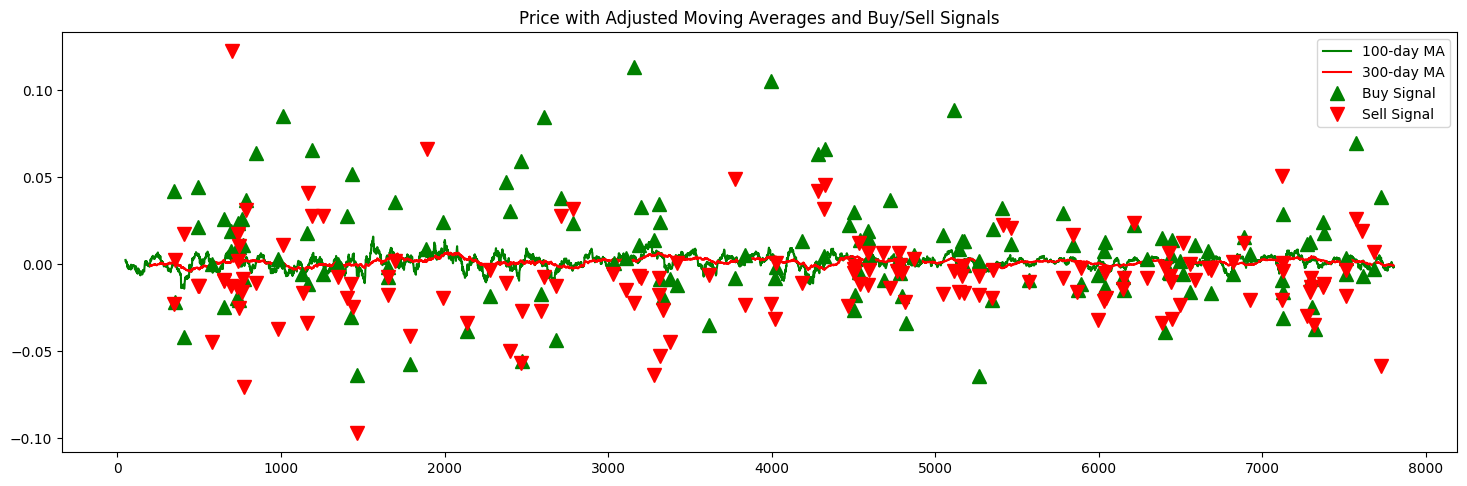

In [29]:
# Position changes
data['Position'] = data['Signal'].diff()

# Plot the Price and Moving Averages
plt.figure(figsize=(18, 12))
plt.subplot(2, 1, 1)
#plt.plot(data.index, data['RET'], label='Price', color='violet')
plt.plot(data.index, data['Short_MA'], label='100-day MA', color='green')
plt.plot(data.index, data['Long_MA'], label='300-day MA', color='red')

# Plot Buy Signals (Green triangles) and Sell Signals (Red triangles)
plt.plot(data[data['Position'] == 1].index, data['RET'][data['Position'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(data[data['Position'] == -1].index, data['RET'][data['Position'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.legend(loc='best')
plt.title('Price with Adjusted Moving Averages and Buy/Sell Signals')

Can ATR be added as a filter? - to avoid trading during high periods of volatility
only trade when atr is below a certain threshold



-- RSI lookback period optimization

-- Test in Different Market Regimes (Bull, Bear, Sideways)

-- RSI + MACD (identify bullish or bearish markets)